## Module 3

Module 3 is built with Random Forest.
It covers the data preprocessing, training, parameter tunning and results for Random Forest model..



In [0]:
import pickle
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,f1_score, recall_score,roc_curve, auc
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import json
import csv
import time 

# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize
# import psutil
# import humanize
# import os
# import GPUtil as GPU
# GPUs = GPU.getGPUs()
# # XXX: only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
# def printm():
#   process = psutil.Process(os.getpid())
#   print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
#   print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
# printm()

In [0]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras import regularizers
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Dropout
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


Using TensorFlow backend.


In [0]:
file1 = "https://drive.google.com/open?id=1PI8qVYbbbZUFlbXFduL4gkAVCFl6BW1U"
file2 = "https://drive.google.com/open?id=1in58RJdqcZc-RxxkhgV2n6JGjbiEVyGf"

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link_text = file1 # The shareable link
fluff, id_1 = link_text.split('=')
print (id_1)

link_text = file2 # The shareable link
fluff, id_2 = link_text.split('=')
print (id_2)

downloaded = drive.CreateFile({'id':id_1}) 
downloaded.GetContentFile("train.csv")
downloaded = drive.CreateFile({'id':id_2}) 
downloaded.GetContentFile("test.csv")  

1PI8qVYbbbZUFlbXFduL4gkAVCFl6BW1U
1in58RJdqcZc-RxxkhgV2n6JGjbiEVyGf


In [0]:
df = pd.read_csv("train.csv")

In [0]:
test_df = pd.read_csv("test.csv")
test_id = np.array(test_df.iloc[:,0])

In [0]:
df.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
df.duplicated().sum()

0

In [0]:
df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [0]:
def add_feature(df, cols):
  
    df['sum'] = df[cols].sum(axis=1)  
    df['min'] = df[cols].min(axis=1)
    df['max'] = df[cols].max(axis=1)
    df['mean'] = df[cols].mean(axis=1)
    
    df['std'] = df[cols].std(axis=1)
    df['skew'] = df[cols].skew(axis=1)
    df['kurt'] = df[cols].kurtosis(axis=1)
    df['med'] = df[cols].median(axis=1)


In [0]:
x_col = df.iloc[:,2:]

In [0]:
x_col.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
add_feature(x_col , x_col.columns)

In [0]:
x_col.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_198,var_199,sum,min,max,mean,std,skew,kurt,med
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,12.7803,-1.0914,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,18.3560,1.9518,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,14.7222,0.3965,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,17.9697,-8.9996,1288.2319,-35.1659,38.1015,6.441159,9.594064,-0.480116,2.630499,6.70260
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,17.9974,-8.8104,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735


In [0]:
# scaler = MinMaxScaler()
scaler = StandardScaler()
features = scaler.fit_transform(x_col)

# features = x_col

In [0]:
features.shape

(200000, 208)

In [0]:
target = df["target"]

In [0]:
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [0]:
# la_enc = LabelEncoder()
# enc_target = la_enc.fit_transform(target)
# target_final = to_categorical(enc_target)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(features,target, test_size = 0.2, random_state = 113)

### Random Forest parameter tunning

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
n_est = [10,20,50,200,150,100]
max_features = ["auto", "sqrt", "sqrt", "auto", "sqrt", "auto"]
max_depth = [15, 25, 50, 64, 50, 32]
min_samples_split = [2,5,10,5,2,10]
bootstrap = [True, False,True, True,False, False]

results_RandomForest = {}

all_time = time.time()
for i in range(len(n_est)):
  
  st = time.time()
  clf_model = RandomForestClassifier(n_estimators = n_est[i],
                                     max_features = max_features[i],
                                     max_depth = max_depth[i],
                                     min_samples_split = min_samples_split[i],
                                     bootstrap = bootstrap[i],
                                     verbose = 2,
                                     n_jobs = -1
                                    )
  clf = clf_model.fit(x_train,y_train)

  try:    
    pickle.dump(clf,open("best_RandomForest_model_with {} estimators and extra parameters.sav".format(n_est[i]), "wb"))
  except:
    print("pickle exception")

  end_time = time.time() - st

  pred = clf.predict(x_test)


  l = { 
      "Training time (sec)": end_time,
       "auc_score" : accuracy_score(y_test, pred),
        "F1_Score" : f1_score(y_test,pred, average = "weighted"),
        "Recall_score" : recall_score(y_test, pred, average = "weighted"),
        "Precision_score" : recall_score(y_test,pred, average = "weighted")
#         "n_estimators" : n_list[i],
#         "max_depth " : max_depth[i],
#         "min_samples_leaf": min_samples_leaf[i],
#         "min_samples_split" : min_samples_split[i]
      
      }
  results_RandomForest["RF_model_for {} estimators".format(n_est[i])] = l
print("total time to complete all models = ",time.time() -all_time)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 10building tree 2 of 10

building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   20.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 20building tree 2 of 20

building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min


building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.6min


building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 19.2min


building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 24.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    2.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    3.3s finished
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 150
building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.3min


building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70 of 150
building tree 71 of 150
building tree 72 of 150
building tree 73 of 150
building tree 74 of 150
building tree 75 of 150
building tree 76 of 150
building tree 77 of 150
building tree 78 of 150
building tree 79 of 150
building tree 80

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 29.1min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 150 out of 150 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.7min


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 15.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.6s


total time to complete all models =  4519.592989444733


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.4s finished


In [0]:
all_result = pd.DataFrame(results_RandomForest)
print(all_result)

                     RF_model_for 10 estimators  RF_model_for 20 estimators  \
F1_Score                               0.853398                    0.854989   
Precision_score                        0.900225                    0.900725   
Recall_score                           0.900225                    0.900725   
Training time (sec)                   20.430434                   99.510767   
auc_score                              0.900225                    0.900725   

                     RF_model_for 50 estimators  RF_model_for 200 estimators  \
F1_Score                               0.852912                     0.852668   
Precision_score                        0.900125                     0.900025   
Recall_score                           0.900125                     0.900025   
Training time (sec)                  242.934148                  1489.185393   
auc_score                              0.900125                     0.900025   

                     RF_model_for 150 estima

### feature selction

Text(0.5, 15.0, 'Predicted label')

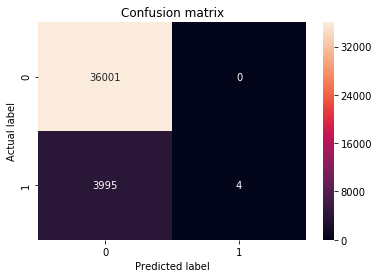

In [0]:
cnf_matrix = confusion_matrix(y_test,pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
clf = pickle.load(open("best_RandomForest_model.sav","rb"))

In [0]:
l = clf.feature_importances_

In [0]:
imp_f = sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), x_col.columns), 
             reverse=True)
imp_f = pd.DataFrame(imp_f, columns = ["Value", "Feature"])

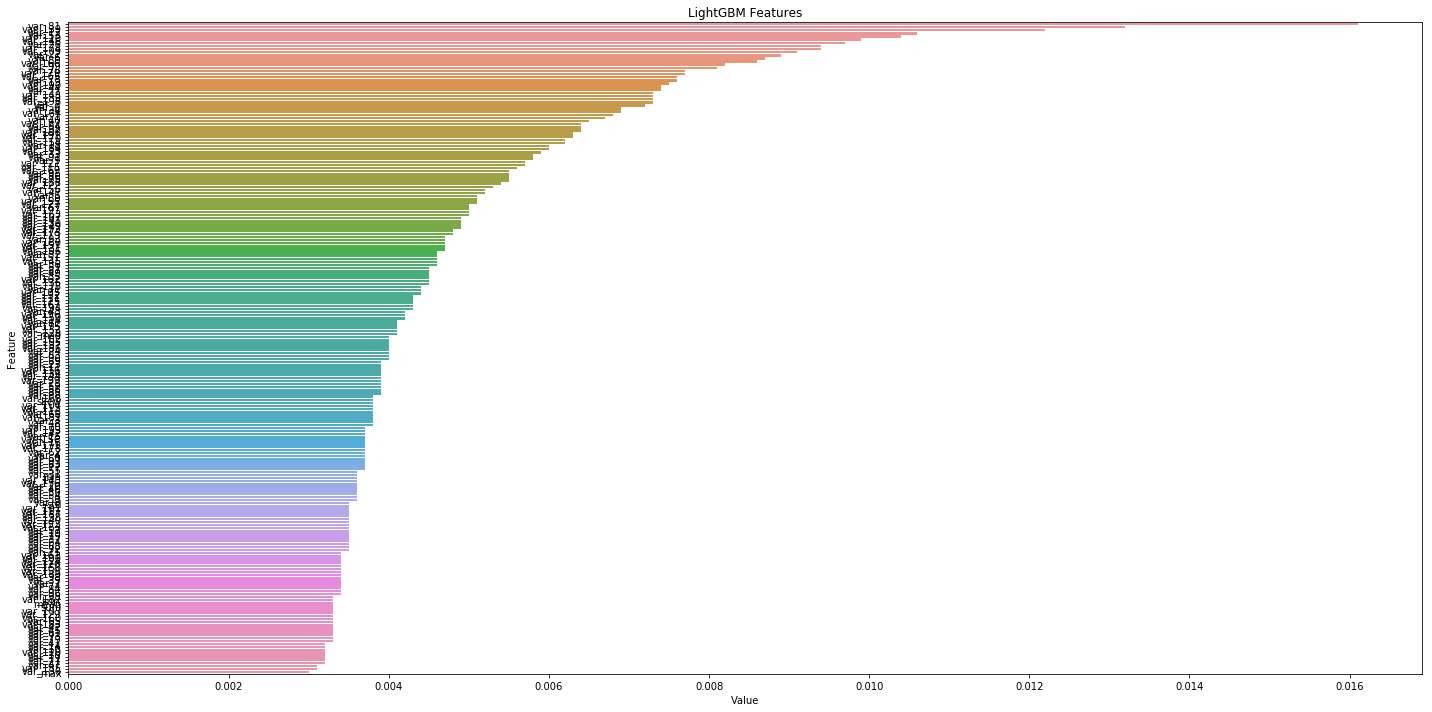

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=imp_f.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [0]:
extracted_imp_features = imp_f[(imp_f["Value"] > 0.004)]

In [0]:
extracted_imp_features.shape

(100, 2)

In [0]:
ext_cols = extracted_imp_features["Feature"].values
ext_cols

array(['var_81', 'var_139', 'var_12', 'var_53', 'var_110', 'var_146',
       'var_26', 'var_174', 'var_109', 'var_22', 'var_6', 'var_80',
       'var_166', 'var_99', 'var_76', 'var_179', 'var_165', 'var_78',
       'var_13', 'var_190', 'var_44', 'var_21', 'var_2', 'var_198',
       'var_148', 'var_133', 'var_0', 'var_34', 'var_164', 'var_1',
       'var_40', 'var_177', 'var_94', 'var_92', 'var_108', 'var_191',
       'var_170', 'var_18', 'var_154', 'var_184', 'var_123', 'var_33',
       'var_91', 'var_9', 'var_121', 'var_115', 'var_169', 'var_95',
       'var_86', 'var_75', 'var_188', 'var_122', 'var_56', 'var_5',
       'var_147', 'var_89', 'var_155', 'var_127', 'var_67', 'var_197',
       'var_163', 'var_107', 'var_172', 'var_149', 'var_141', 'var_130',
       'var_173', 'var_119', 'var_93', 'var_180', 'var_157', 'var_131',
       'var_106', 'var_51', 'var_36', 'var_32', 'var_151', 'var_145',
       'var_87', 'var_49', 'var_35', 'var_162', 'var_135', 'var_118',
       'var_71', 'var_

In [0]:
extracted_imp_features.to_csv("Features_with_Random_forest.csv", index =False)

In [0]:
old_common_features = pd.read_csv("common_features.csv")

new_feat = imp_f["Feature"].values

common_features = []
for i in old_common_features.top_feature:
  for j in new_feat:
    if i == j:
      common_features.append(i)

In [14]:
common_features

['var_6',
 'var_110',
 'var_53',
 'var_26',
 'var_22',
 'var_99',
 'var_2',
 'var_190',
 'var_133',
 'var_0',
 'var_1',
 'var_40',
 'var_184',
 'var_179',
 'var_78',
 'var_191',
 'var_94',
 'var_170',
 'var_67',
 'var_18',
 'var_173',
 'var_118',
 'var_164',
 'var_147',
 'var_91',
 'var_89',
 'var_95',
 'var_155',
 'var_35']

In [15]:
print(" Common features after Random Forest = ", len(common_features))

 Common features after Random Forest =  29


### Generate Test data solution file

In [0]:
clf = pickle.load(open("best_model__0.sav","rb"))

In [0]:
test_data = test_df.iloc[:,1:]

In [0]:
test_data.head(5)

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [0]:
add_feature(test_data, test_data.columns)

  * Loading new data metrics: 
done adding extra features


In [0]:
scaled_data = scaler.fit_transform(test_data)

In [0]:
predictions = clf.predict(scaled_data)

In [0]:
predictions[:10]

array([0.12684959, 0.2231364 , 0.22951021, 0.11019055, 0.06268104,
       0.00644453, 0.01314518, 0.20056877, 0.00614288, 0.01591304])

In [0]:
test_id

array(['test_0', 'test_1', 'test_2', ..., 'test_199997', 'test_199998',
       'test_199999'], dtype=object)

In [0]:
gen_csv(test_id, predictions, "soln_scaler_of_lgb_model_0")   #0.45958 not good, overfitting

          target
test_0  0.126850
test_1  0.223136
test_2  0.229510
test_3  0.110191
test_4  0.062681
-------------Done-----------------


In [0]:
for i,val in enumerate(predictions):
  if val < 0.4:
    predictions[i] = 0
  else:
    predictions[i] = 1
gen_csv(test_id, predictions, "soln_scaler_of_lgb_model_0_classes")    

        target
test_0     0.0
test_1     0.0
test_2     0.0
test_3     0.0
test_4     0.0
-------------Done-----------------


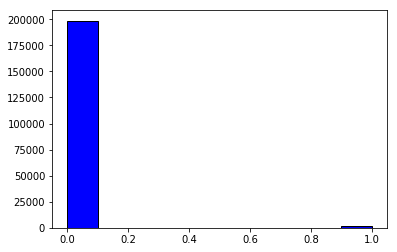

In [0]:
plt.hist(predictions, color = "blue", edgecolor = 'black')
plt.show()